## Take OTU table, QC, generate preliminary figures
#### Last updated 06-26-2017 Sarah K. Hu

In [99]:
#Load required libraries
library(reshape2)
library(ggplot2)
library(vegan)
library(plyr)

In [100]:
#count<-read.table('closed_PR2_97.txt', sep="\t",header=TRUE)
#colnames(count)[2:6]<-c('Sample_1',"Sample2", 'Sample_3', 'Sample_4', 'Sample_5')

In [101]:
#tmpcount<-count[c(1:6,16)]
#head(tmpcount)
#write.table(tmpcount, file="V4_OTUtable_test.txt", sep="\t", row.names=FALSE, quote=FALSE)

In [102]:
#Import OTU table. Make sure heading looks good.
count<-read.table('V4_OTUtable_test.txt', sep="\t",header=TRUE)
head(count) #make sure samples are column names and OTU.IDs (from PR2) are row names
dim(count) #V4_OTUtable_test.txt should be 1998 rows and 7 columns


OTU.ID,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,taxonomy
AB353770.1.1740_U,1,0,0,0,0,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Peridiniopsis; Peridiniopsis+kevei
KF130109.1.1755_U,0,5,2,79,2,Eukaryota; Alveolata; Dinophyta; Syndiniales; Dino-Group-II; Dino-Group-II-Clade-14; Dino-Group-II-Clade-14_X; Dino-Group-II-Clade-14_X+sp.
AB284159.1.1765_U,0,8,4,67,16,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Protoperidinium; Protoperidinium+bipes
AY256316.1.1219_U,0,0,1,2,4,Eukaryota; Stramenopiles; Ochrophyta; Bacillariophyta; Bacillariophyta_X; Raphid-pennate; Raphid-pennate_X; Raphid-pennate_X+sp.
AM235536.1.1627_U,0,0,0,0,0,Eukaryota; Archaeplastida; Streptophyta; Embryophyceae; Embryophyceae_X; Embryophyceae_XX; Uromyrtus; Uromyrtus+metrosideros
EU087259.1.908_U,15,0,64,6,319,Eukaryota; Rhizaria; Cercozoa; Filosa-Thecofilosea; Ebriida; TAGIRI1-lineage; TAGIRI1-lineage_X; TAGIRI1-lineage_X+sp.


[1] 6138    7

In [103]:
##Get quick stats of OTU results
length(count$OTU.ID) #Total number of OTUs generated
colsum<-apply(count[2:5],2,sum) #Colums 2:5 are my sample colums
colsum #number of sequences per sample

[1] 6138

Sample_1 Sample_2 Sample_3 Sample_4 
  377016    75021    99619   395592

In [104]:
##Filter out OTUs with only 1 sequence, singletons
rowsum<-apply(count[2:6],1,sum) #remove global singletons.
count.no1 = count[ rowsum>1, ]  #count.no1 = OTU table without global singletons
dim(count)[1] - dim(count.no1)[1] #Outputs the number of OTUs (total) lost in this step

[1] 2633

## Barplot distribution of OTU size per sample

In [105]:
#Isolate only count colums
counts_only<-count.no1[2:6]
seq_total<-apply(counts_only,2,sum) #number of sequences per sample
OTU_count<-colSums(counts_only>0) #total number of OTUs
OTU_single<-colSums(counts_only==1) #Number of singleton OTUs
OTU_double<-colSums(counts_only==2) #Number of doubleton OTUs
OTU_else<-colSums(counts_only>2) #Number of OTUs with more than 2 sequences

sample_info<-data.frame(seq_total,OTU_count,OTU_single,OTU_double,OTU_else)# Compile
head(sample_info) #dataframe with OTU stats per sample
# write.csv(sample_info, file="OTUstats.csv") #Option to write out to table

,seq_total,OTU_count,OTU_single,OTU_double,OTU_else
Sample_1,376657,2429,282,330,1817
Sample_2,74972,1177,322,164,691
Sample_3,99530,1497,367,217,913
Sample_4,395353,1925,311,275,1339
Sample_5,349093,2202,377,312,1513


In [106]:
#Plot it
sample_info$samples<-row.names(sample_info)
allM<-melt(sample_info) #Melt to long format
allM$Figure<-"Sequences"
allM$Figure[allM$variable == "OTU_count"]<-"Total OTUs"
otudist<-c("OTU_single", "OTU_double", "OTU_else")
allM$Figure[allM$variable %in% otudist]<-"Breakdown of OTUs"
#head(allM)


Using samples as id variables


In [107]:
#Basic bar plot
bar_stats<- ggplot(allM, aes(x=samples, y=value, fill=variable))+geom_bar(stat="identity",position="stack",color="black")+theme_bw()+theme(axis.text.x = element_text(angle = 90,hjust=1,vjust=0.5,size=8),axis.text.y=element_text(size=12),legend.position = "top")

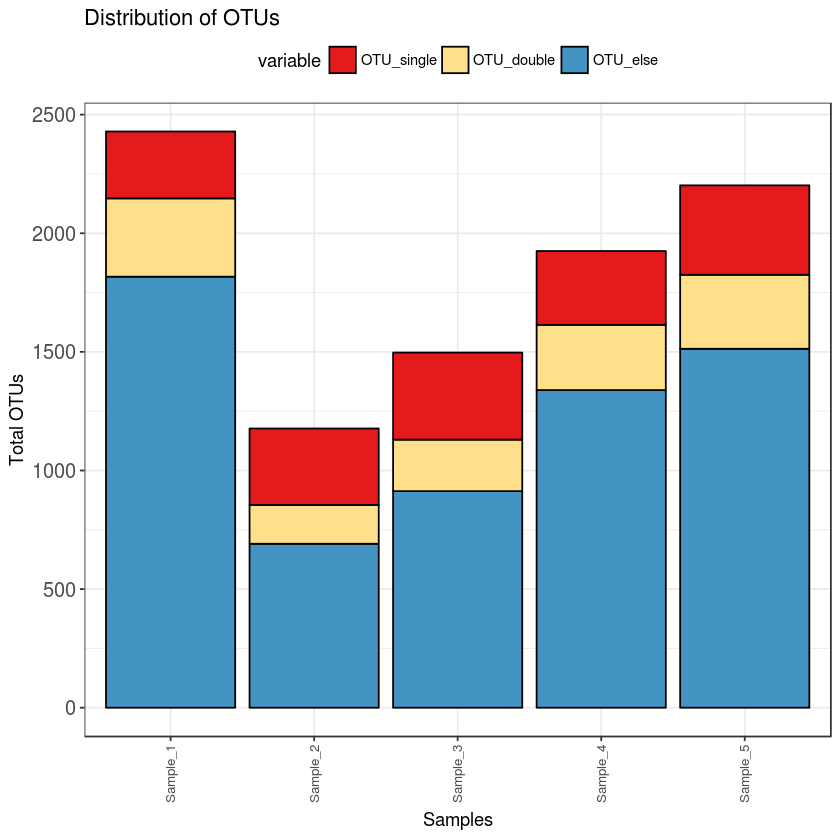

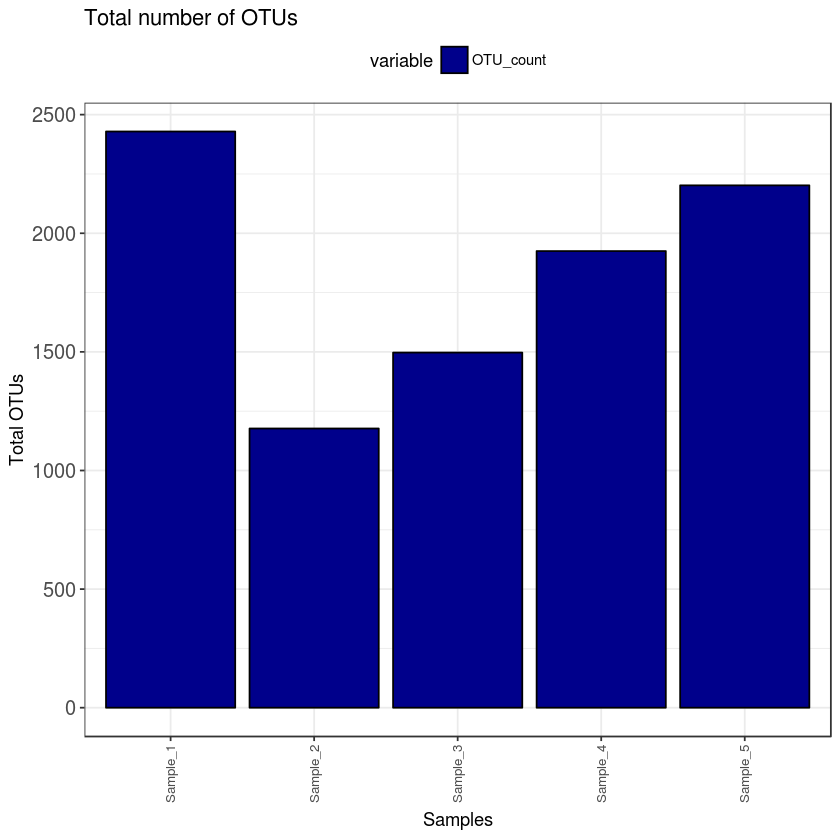

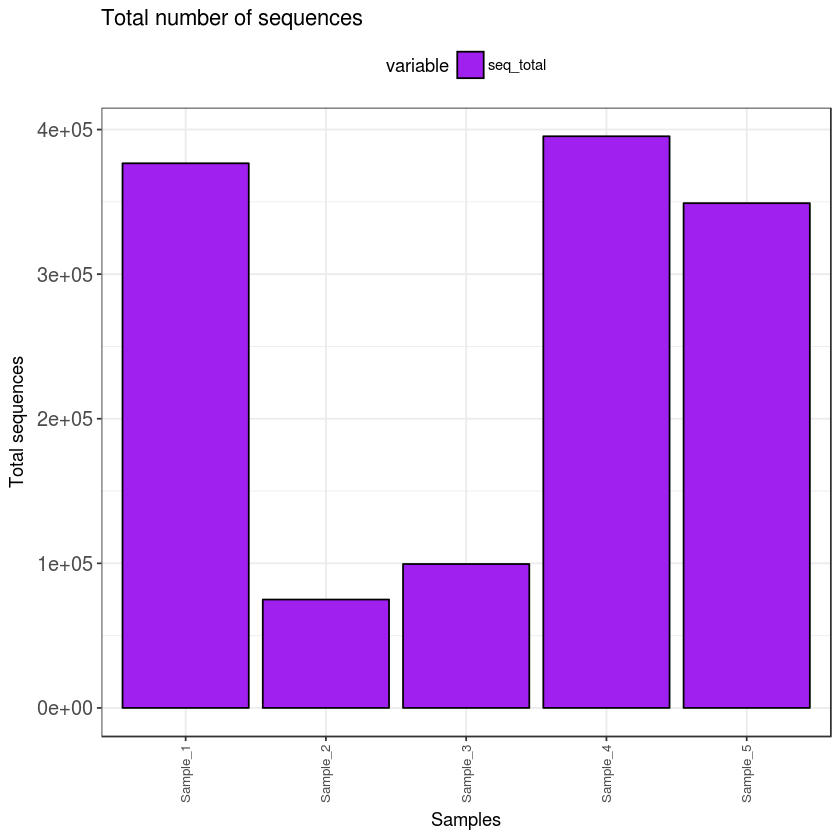

In [108]:
bar_stats %+% subset(allM, Figure %in% "Breakdown of OTUs")+labs(title="Distribution of OTUs",x="Samples", y="Total OTUs")+scale_fill_manual(values=c("#e41a1c","#fee08b","#4393c3"))
bar_stats %+% subset(allM, Figure %in% "Total OTUs")+labs(title="Total number of OTUs",x="Samples", y="Total OTUs")+scale_fill_manual(values=c("darkblue"))
bar_stats %+% subset(allM, Figure %in% "Sequences")+labs(title="Total number of sequences",x="Samples", y="Total sequences")+scale_fill_manual(values=c("purple"))

In [109]:
#save(counts_only, count.no1, allM, file="Checkpoint1_PrelimFigs.RData") #Optional save R objects
#load("Checkpoint1_PrelimFigs.RData",verbose=T) #Option to load R objects from previous

# Option to remove unwanted samples

In [110]:
#Based on the total number of sequences in each sample, I want to only keep samples with more than 50,000 sequences.
#Remove Sample 2
count.no1$Sample_2<-NULL
head(count.no1)

,OTU.ID,Sample_1,Sample_3,Sample_4,Sample_5,taxonomy
2,KF130109.1.1755_U,0,2,79,2,Eukaryota; Alveolata; Dinophyta; Syndiniales; Dino-Group-II; Dino-Group-II-Clade-14; Dino-Group-II-Clade-14_X; Dino-Group-II-Clade-14_X+sp.
3,AB284159.1.1765_U,0,4,67,16,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Protoperidinium; Protoperidinium+bipes
4,AY256316.1.1219_U,0,1,2,4,Eukaryota; Stramenopiles; Ochrophyta; Bacillariophyta; Bacillariophyta_X; Raphid-pennate; Raphid-pennate_X; Raphid-pennate_X+sp.
6,EU087259.1.908_U,15,64,6,319,Eukaryota; Rhizaria; Cercozoa; Filosa-Thecofilosea; Ebriida; TAGIRI1-lineage; TAGIRI1-lineage_X; TAGIRI1-lineage_X+sp.
7,EF173005.1.1679_U,18,7,0,22,Eukaryota; Alveolata; Dinophyta; Syndiniales; Dino-Group-II; Dino-Group-II-Clade-22; Dino-Group-II-Clade-22_X; Dino-Group-II-Clade-22_X+sp.
8,GU820024.1.1392_U,3,0,0,3,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Dinophyceae_XXX; Dinophyceae_XXX+sp.


# Option to randomly subsample OTU table
### so that all samples have the same number of sequences

In [111]:
#Optional code to subsample
#Assign row names as OTU IDs
row.names(count.no1)<-count.no1$OTU.ID
#Isolate only columns with data
keep<-count.no1[2:5];head(keep)
sub<-min(colSums(keep)); sub #sub =total number of sequences that is fewest among all samples

#Requires vegan library
rare <- rrarefy(t(keep), sub) #Randomly subsamples data so that all sample have the same number of sequences
subsampled<-as.data.frame(t(rare))
colSums(subsampled) #all should be equal to sub (in test data, n=99,530)

,Sample_1,Sample_3,Sample_4,Sample_5
KF130109.1.1755_U,0,2,79,2
AB284159.1.1765_U,0,4,67,16
AY256316.1.1219_U,0,1,2,4
EU087259.1.908_U,15,64,6,319
EF173005.1.1679_U,18,7,0,22
GU820024.1.1392_U,3,0,0,3


[1] 99530

Sample_1 Sample_3 Sample_4 Sample_5 
   99530    99530    99530    99530

## Basic diversity estimates

In [112]:
#Calculate alpha diversity

#diversity measurement that accounts for both abundance and evenness of the species present (both evenness and richness). proportion of species relative to the total multiplied by the ln of the proportion
shannon<-diversity(subsampled,index="shannon",2)
#evennes in the community
invsimp<-diversity(subsampled,index="invsimpson",2)

OTU_count<-colSums(subsampled>0) #to evaluate species richness
alpha<-data.frame(shannon,invsimp,OTU_count) #combine measurements
head(alpha)

,shannon,invsimp,OTU_count
Sample_1,5.201800,46.10943,1869
Sample_3,4.183098,11.58639,1497
Sample_4,4.732640,38.18079,1390
Sample_5,4.662517,27.50262,1634


In [113]:
alpha$samples<-row.names(alpha)
alpha.m<-melt(alpha)
head(alpha.m)

Using samples as id variables


samples,variable,value
Sample_1,shannon,5.201800
Sample_3,shannon,4.183098
Sample_4,shannon,4.732640
Sample_5,shannon,4.662517
Sample_1,invsimp,46.109434
Sample_3,invsimp,11.586386


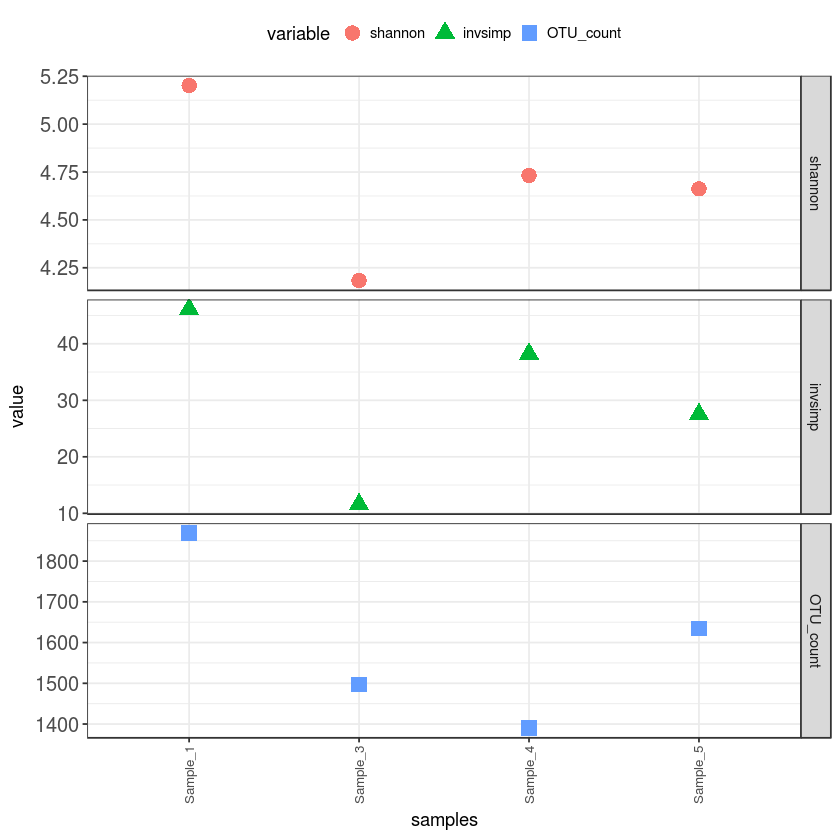

In [114]:
ggplot(alpha.m, aes(x=samples, y=value, fill=variable, shape=variable))+geom_point(size=4, aes(color=variable))+facet_grid(variable~.,scales="free")+theme_bw()+theme(axis.text.x = element_text(angle = 90,hjust=1,vjust=0.5,size=8),axis.text.y=element_text(size=12),legend.position = "top")

# Community composition plot - specific to PR2 db

In [115]:
#head(count.no1) #original data, has OTU and taxonomy information
#head(subsampled) #subsampled data for analysis
key<-count.no1[c(1,6)] #OTU ID to taxonomy key
subsampled$OTU.ID<-row.names(subsampled)

In [116]:
#Get taxonomic information (by OTU.ID) back on subsampled data
count.subsampled<-join(subsampled, count.no1[c(1,6)], by="OTU.ID", type="left", match="first")
head(count.subsampled); dim(count.subsampled)

,OTU.ID,Sample_1,Sample_3,Sample_4,Sample_5,taxonomy
KF130109.1.1755_U,KF130109.1.1755_U,0,2,22,1,Eukaryota; Alveolata; Dinophyta; Syndiniales; Dino-Group-II; Dino-Group-II-Clade-14; Dino-Group-II-Clade-14_X; Dino-Group-II-Clade-14_X+sp.
AB284159.1.1765_U,AB284159.1.1765_U,0,4,11,5,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Protoperidinium; Protoperidinium+bipes
AY256316.1.1219_U,AY256316.1.1219_U,0,1,0,4,Eukaryota; Stramenopiles; Ochrophyta; Bacillariophyta; Bacillariophyta_X; Raphid-pennate; Raphid-pennate_X; Raphid-pennate_X+sp.
EU087259.1.908_U,EU087259.1.908_U,4,64,1,90,Eukaryota; Rhizaria; Cercozoa; Filosa-Thecofilosea; Ebriida; TAGIRI1-lineage; TAGIRI1-lineage_X; TAGIRI1-lineage_X+sp.
EF173005.1.1679_U,EF173005.1.1679_U,2,7,0,6,Eukaryota; Alveolata; Dinophyta; Syndiniales; Dino-Group-II; Dino-Group-II-Clade-22; Dino-Group-II-Clade-22_X; Dino-Group-II-Clade-22_X+sp.
GU820024.1.1392_U,GU820024.1.1392_U,0,0,0,1,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Dinophyceae_XXX; Dinophyceae_XXX+sp.


[1] 3505    6

## Parse by taxonomy column

In [117]:
#This is specific to the PR2 database. 
#Depending on your scientific question, you will need to review the taxonomic grouping
#Function, makes a simplifed "Taxa" column based on PR2 output

pr2_rename_taxa<-function(df){
  library(reshape2)
  split<-colsplit(df$taxonomy, "; ", c("Level1","Level2","Level3","Level4","Level5","Level6", "Level7","Level8","Level9", "Level10", "Level11", "Level12"))
  split[ is.na(split) ] = "XXX"
  split[ split == "" ] = "XXX"
  split$Taxa<-"Other/unknown"
  split$Taxa[split$Level1 == "No blast hit"]="No blast hit"
  split$Taxa[split$Level1 == "Unassigned"]="Unassigned"
  split$Taxa[split$Level1 == "None"]="None"
  split$Taxa[split$Level2=="Amoebozoa"]="Amoebozoa"
  split$Taxa[split$Level2=="Apusozoa"]="Other/unknown"
  split$Taxa[split$Level2=="Eukaryota_X"]="Other/unknown"
  split$Taxa[split$Level2=="Eukaryota_Mikro"]="Other/unknown"
  split$Taxa[split$Level2=="Stramenopiles"]="Stramenopiles-Other"
  split$Taxa[split$Level2=="Alveolata"]="Alveolates-Other"
  split$Taxa[split$Level2=="Opisthokonta"]="Opisthokonts-Other"
  split$Taxa[split$Level2=="Archaeplastida"]="Archaeplastids-Other"
  split$Taxa[split$Level2=="Excavata"]="Excavates"
  split$Taxa[split$Level2=="Rhizaria"]="Rhizaria-Other"
  split$Taxa[split$Level2=="Hacrobia"]="Other/unknown"
  split$Taxa[split$Level3=="Haptophyta"]="Haptophytes"
  split$Taxa[split$Level3=="Fungi"]="Opisthokont-Fungi"
  split$Taxa[split$Level3=="Metazoa"]="Opisthokont-Metazoa"
  split$Taxa[split$Level3=="Foraminifera"]="Rhizaria-Foraminifera"
  split$Taxa[split$Level3=="Dinophyta"]="Alveolates-Dinoflagellates"
  split$Taxa[split$Level4=="Syndiniales"]="Alveolates-Syndiniales"
  split$Taxa[split$Level3=="Cryptophyta"]="Cryptophytes"
  split$Taxa[split$Level3=="Ciliophora"]="Alveolates-Ciliates"
  split$Taxa[split$Level3=="Chlorophyta"]="Archaeplastids-Chlorophytes"
  split$Taxa[split$Level3=="Cercozoa"]="Rhizaria-Cercozoa"
  split$Taxa[split$Level4=="Acantharea"]="Rhizaria-Acantharia"
  split$Taxa[split$Level4=="Chrysophyceae-Synurophyceae"]="Stramenopiles-Chrysophytes"
  split$Taxa[split$Level4=="Pelagophyceae"]="Stramenopiles-Pelagophytes"
  split$Taxa[split$Level4=="Bacillariophyta"]="Stramenopiles-Diatoms"
  split$Taxa[split$Level4=="MAST"]="Stramenopiles-MAST"
  split$Taxa[split$Level4=="Polycystinea"]="Rhizaria-Polycystines"
  split$Taxa[split$Level4=="RAD-C"]="Rhizaria-RAD (A,B,C)"
  split$Taxa[split$Level4=="RAD-B"]="Rhizaria-RAD (A,B,C)"
  split$Taxa[split$Level4=="RAD-A"]="Rhizaria-RAD (A,B,C)"
  return(split)
} 
newtax<-pr2_rename_taxa(count.subsampled)
unique(newtax$Taxa) #Simplified taxonomic group naming schematic
data_binned<-data.frame(count.subsampled, newtax) 

[1] "Alveolates-Syndiniales"      "Alveolates-Dinoflagellates" 
 [3] "Stramenopiles-Diatoms"       "Rhizaria-Cercozoa"          
 [5] "Haptophytes"                 "Stramenopiles-MAST"         
 [7] "Cryptophytes"                "Alveolates-Ciliates"        
 [9] "Rhizaria-RAD (A,B,C)"        "Rhizaria-Polycystines"      
[11] "Opisthokonts-Other"          "Opisthokont-Fungi"          
[13] "Rhizaria-Acantharia"         "Stramenopiles-Other"        
[15] "Archaeplastids-Other"        "Archaeplastids-Chlorophytes"
[17] "Stramenopiles-Pelagophytes"  "Stramenopiles-Chrysophytes" 
[19] "Opisthokont-Metazoa"         "Excavates"                  
[21] "Other/unknown"               "Amoebozoa"                  
[23] "Alveolates-Other"            "Rhizaria-Other"             
[25] "Rhizaria-Foraminifera"

In [118]:
data.m<-melt(data_binned) #melt
#head(data.m)
data.agg<-aggregate(data.m$value, by=list(Taxa=data.m$Taxa,Samples=data.m$variable),sum) #sum sequences by taxonomic group
save(data.agg, data.m, data_binned, file="Checkpoint2_PrelimFigs.Rdata")

Using OTU.ID, taxonomy, Level1, Level2, Level3, Level4, Level5, Level6, Level7, Level8, Level9, Level10, Level11, Level12, Taxa as id variables


## Set up to plot taxonomic groups

In [119]:
tax_order=c("Alveolates-Ciliates","Alveolates-Dinoflagellates","Alveolates-Syndiniales","Alveolates-Other","Archaeplastids-Chlorophytes","Archaeplastids-Other","Cryptophytes","Excavates","Haptophytes","Rhizaria-Acantharia","Rhizaria-Cercozoa","Rhizaria-Polycystines","Rhizaria-RAD (A,B,C)","Stramenopiles-Diatoms","Stramenopiles-Pelagophytes","Stramenopiles-MAST","Stramenopiles-Chrysophytes","Stramenopiles-Other","Opisthokont-Fungi","Opisthokont-Metazoa","Opisthokonts-Other","Other/unknown","Unassigned")
tax_color=c("#800026","#cb181d","#e7298a","#df65b0","#fc4e2a","#fd8d3c","#fed976","#c7e9b4","#7fcdbb","#41ae76","#238b45","#006d2c","#00441b","#c6dbef","#6baed6","#1d91c0","#225ea8","#253494","#081d58","#54278f","#8c510a","#bf812d","#dfc27d")
names(tax_color)<-tax_order
data.agg$tax<-factor(data.agg$Taxa, levels=rev(tax_order)) #factoring
head(data.agg)

Taxa,Samples,x,tax
Alveolates-Ciliates,Sample_1,29187,Alveolates-Ciliates
Alveolates-Dinoflagellates,Sample_1,13632,Alveolates-Dinoflagellates
Alveolates-Other,Sample_1,126,Alveolates-Other
Alveolates-Syndiniales,Sample_1,7234,Alveolates-Syndiniales
Amoebozoa,Sample_1,1,NA
Archaeplastids-Chlorophytes,Sample_1,312,Archaeplastids-Chlorophytes


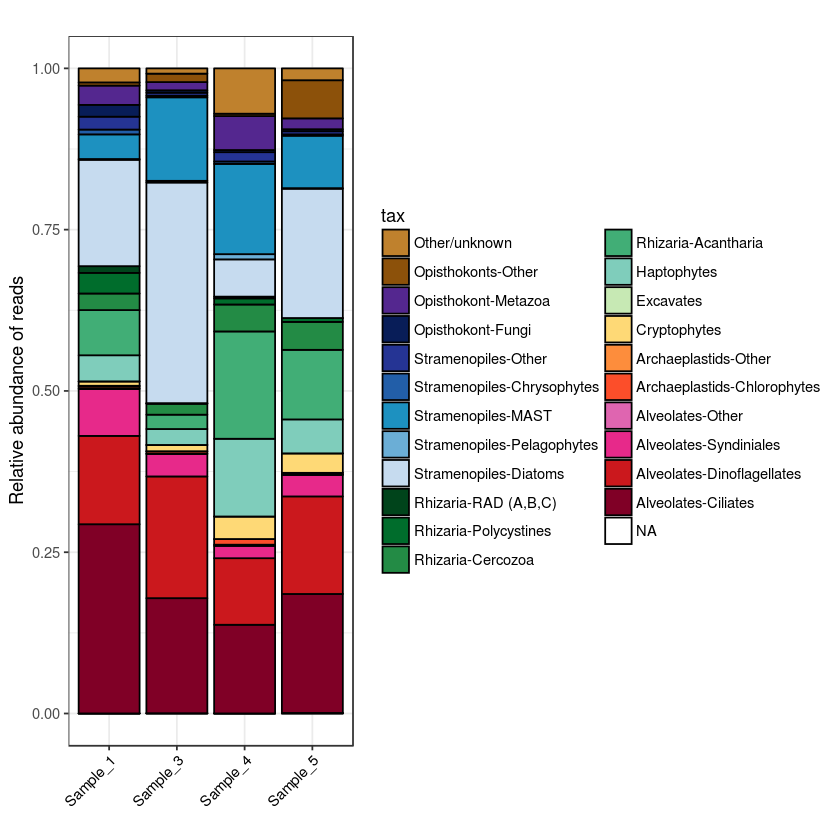

In [120]:
#Bar plot of community composition
ggplot(data.agg[order(data.agg$tax),], aes(y=x,fill=tax,x=Samples))+geom_bar(position = "fill", stat = "identity", color="black",aes(fill=tax))+scale_fill_manual(values=tax_color)+labs(title="", x="",y="Relative abundance of reads")+theme_bw()+theme(legend.position="right",axis.text.x = element_text(angle=45, hjust=1,vjust=1,color="black"))
#Change position = "fill" to position="stack" to look at total abundance

# Last updated 06-26-2017 Sarah K. Hu